In [29]:
import numpy as np
import copy,math
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [4]:
x_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,232,178])

In [11]:
# data stored in numpy array/matrix

print(f"X Shape: {x_train.shape}, X Type: {type(x_train)})")
print(x_train)
print(f"Y_Shape:{y_train.shape}, Y Type: {type(y_train)}")
print(y_train)

X Shape: (3, 4), X Type: <class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y_Shape:(3,), Y Type: <class 'numpy.ndarray'>
[460 232 178]


In [14]:
# init parameters
b_init = 785.12937575806
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [16]:
# Single Prediction element by element

def predict_single_loop(x, w, b):
    n = x.shape[0] # num of features
    p = 0
    for i in range(n):
        p_i = x[i]*w[i]
        p += p_i
    p += b
    return p

In [32]:
# get a row from our training data
x_vec = x_train [0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make prediction
start = datetime.now()
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"time: {datetime.now()-start}")
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
time: 0:00:00.000117
f_wb shape (), prediction: 459.94823657806


In [26]:
# Single predict, vector (using np.dot)
def predict(x,w,b):
    p = np.dot(x,w)+b
    return p

In [33]:
# get a row from our training data
x_vec = x_train [0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make prediction
start = datetime.now()
f_wb = predict(x_vec, w_init, b_init)
print(f"time: {datetime.now()-start}")
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
time: 0:00:00.003245
f_wb shape (), prediction: 459.94823657806


In [36]:
# Compute Cost J(w,b)
def compute_cost(x,y, w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i],w)+b
        cost += (f_wb_i - y[i]) **2
    cost /= 2*m
    return cost

In [38]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"optimal cost: {cost}")

optimal cost: 0.001339689346395045


In [43]:
# compute gradient descent
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.0

    for i in range(m):
        # compute err for each record
        err = (np.dot(x[i],w)+b) - y[i]
        for j in range(n):
            # compute gradient for w
            dj_dw[j]+= err * x[i,j]
        # gradient for b
        dj_db += err
        dj_dw /=m
        dj_db/=m

    return dj_db, dj_dw
            
    

In [44]:
temp_dj_db, temp_dj_dw = compute_gradient(x_train, y_train, w_init,b_init)
print(f"dj_db at initial w,b: {temp_dj_db}")
print(f"dj_dw at initial w,b: {temp_dj_dw}")

dj_db at initial w,b: -0.024922589082258903
dj_dw at initial w,b: [-26.88  -0.06  -0.03  -0.92]


In [48]:
# Gradient Descent
def gradient_descent(x,y,w_in, b_in, costfn, gradientfn, alpha, num_it):
    J_History = [] #CostHist
    w = copy.deepcopy(w_in) #avoid modifying globl w within function
    b = b_in

    # Loop for num_it (times) iterations
    for i in range(num_it):
        # Calculate the gradients
        dj_db, dj_dw = compute_gradient(x,y,w,b)

        # Update parameters using w,b, alpha & gradient
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:
            J_History.append(costfn(x,y,w,b))

        # Print cost every at intervals 10 times

        if i% math.ceil(num_it/10) == 0:
            print(f"Iteration{i:4d}, Cost {J_History[-1]:8.2f} ")

    return w,b,J_History
                             


In [52]:
# init parameters
init_w = np.zeros_like(w_init)
init_b = 0.

# some gradient descent setttings
iterations = 1000
alpha = 5.0e-7

# run gradient descent
w_final, b_final, J_Hist = gradient_descent(x_train, y_train, init_w, init_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration   0, Cost 24346.52 
Iteration 100, Cost   753.49 
Iteration 200, Cost   753.67 
Iteration 300, Cost   753.86 
Iteration 400, Cost   754.04 
Iteration 500, Cost   754.22 
Iteration 600, Cost   754.40 
Iteration 700, Cost   754.58 
Iteration 800, Cost   754.76 
Iteration 900, Cost   754.94 
b,w found by gradient descent: 0.00,[ 0.2   0.   -0.    0.01] 
prediction: 411.00, target value: 460
prediction: 276.74, target value: 232
prediction: 166.66, target value: 178


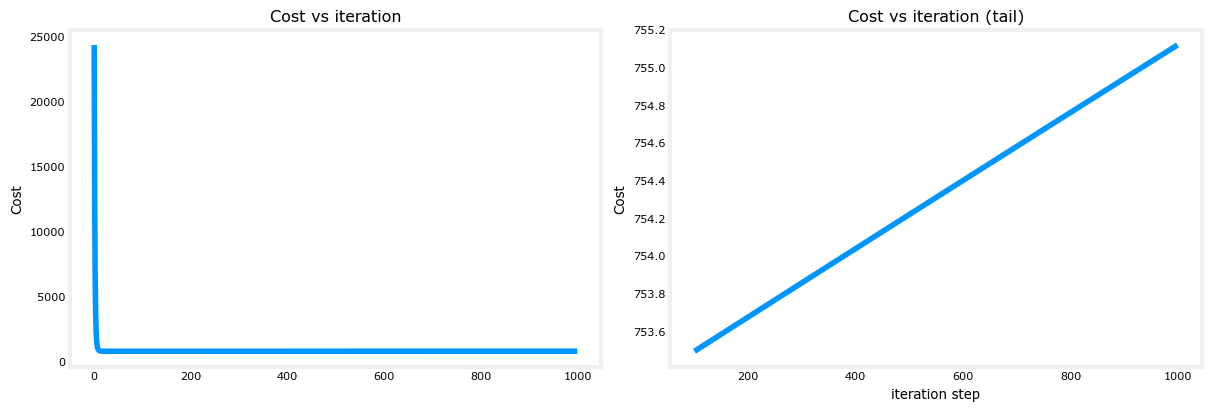

In [56]:
# Plot cost vs iterations

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_Hist)
ax2.plot(100+ np.arange(len(J_Hist[100:])), J_Hist[100:])
ax1.set_title("Cost vs iteration"); ax2.set_title("Cost vs iteration (tail)")
ax1.set_ylabel("Cost"); ax2.set_ylabel("Cost")
ax2.set_xlabel("iteration setp"); ax2.set_xlabel("iteration step")
plt.show()